<a href="https://colab.research.google.com/github/Varshini151205/ML/blob/main/Unit4(ensemble_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ml lab /diabetes.csv')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("precision:",metrics.precision_score(y_test,y_pred))

accuracy: 0.7532467532467533
Recall: 0.7272727272727273
precision: 0.6349206349206349


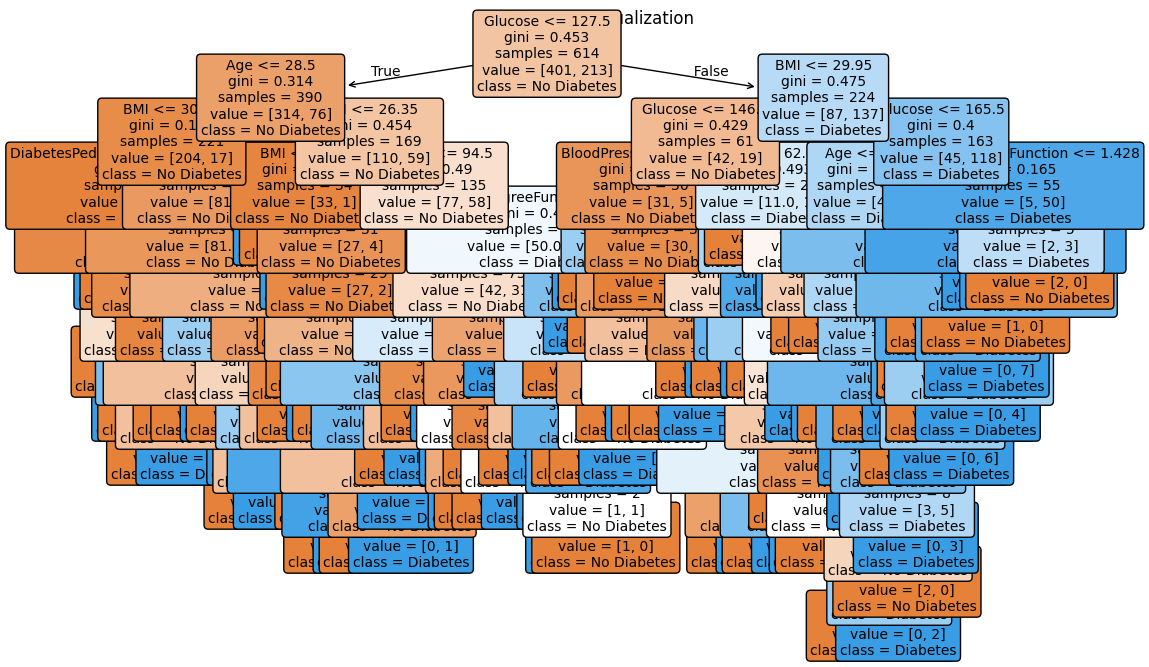

In [81]:
plt.figure(figsize=(12,8))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
dot_data=StringIO()
export_graphviz(clf,out_file)

In [42]:
#hard voting and soft voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

df=pd.read_csv('/content/drive/MyDrive/ml lab /diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()


In [43]:
#hard voting
hard_voting = VotingClassifier(estimators=[
    ('lr', model1), ('dt', model2), ('knn', model3)
], voting='hard')

hard_voting.fit(X_train, y_train)
hard_pred = hard_voting.predict(X_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, hard_pred))

Hard Voting Accuracy: 0.7186147186147186


In [44]:
#soft voting
soft_voting = VotingClassifier(estimators=[
    ('lr', model1), ('dt', model2), ('knn', model3)
], voting='soft')

soft_voting.fit(X_train, y_train)
soft_pred = soft_voting.predict(X_test)

print("Soft Voting Accuracy:", accuracy_score(y_test, soft_pred))

Soft Voting Accuracy: 0.7056277056277056


compared to decision tree hard voting and soft voting has lee accuracy
**decision tree**
accuracy: 0.7532467532467533
**hard voting**
Accuracy: 0.7142857142857143
**soft voting**
Accuracy: 0.7056277056277056


In [62]:

#bagging
#random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

df=pd.read_csv('/content/drive/MyDrive/ml lab /diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [63]:

rf = RandomForestClassifier(n_estimators=180, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7575757575757576

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



DT accuracy: 0.7532467532467533
Hard Voting Accuracy: 0.7229437229437229
Soft Voting Accuracy: 0.7186147186147186
RANDOM FOREST Accuracy: 0.7532467532467533 if n_estimators=100
Accuracy: 0.7575757575757576 if n_estimators=180

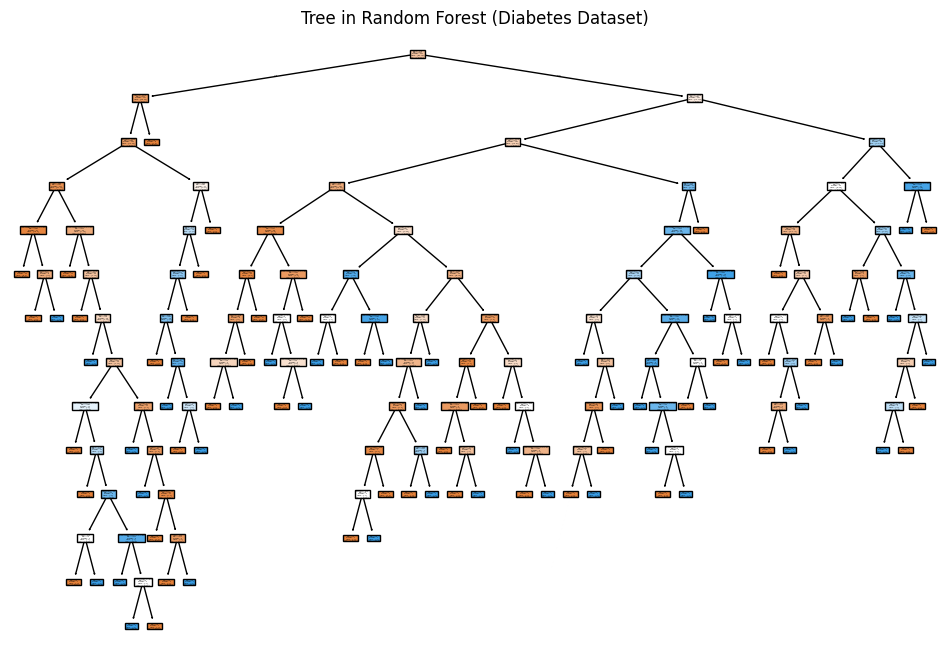

In [65]:
plt.figure(figsize=(12,8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Diabetes','Diabetes'], filled=True)
plt.title("Tree in Random Forest (Diabetes Dataset)")
plt.show()


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

df=pd.read_csv('/content/drive/MyDrive/ml lab /diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

print("Hard Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Hard Voting Classifier Accuracy: 0.7186147186147186


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
df=pd.read_csv('/content/drive/MyDrive/ml lab /diabetes.csv')
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


AdaBoost Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       151
           1       0.65      0.62      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



In [76]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

AdaBoost Accuracy: 0.7575757575757576

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       151
           1       0.65      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



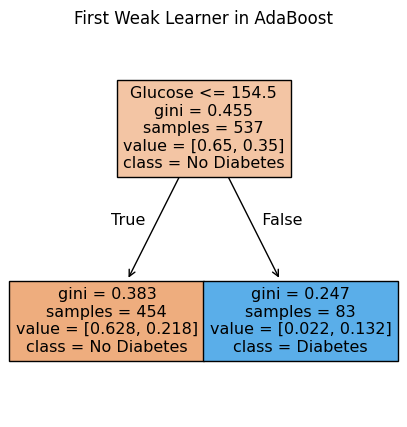

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5))
plot_tree(
    ada.estimators_[0],  # first weak learner
    feature_names=X.columns,
    class_names=['No Diabetes','Diabetes'],
    filled=True
)
plt.title("First Weak Learner in AdaBoost")
plt.show()


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('/content/drive/MyDrive/ml lab /diabetes.csv')

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100]
max_depth_list = [None, 3, 5]

for n in n_estimators_list:
    for depth in max_depth_list:
        rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"n_estimators={n}, max_depth={depth} => Accuracy: {acc:.4f}")
        #print(classification_report(y_test, y_pred, zero_division=0))
        print("-"*70)


n_estimators=10, max_depth=None => Accuracy: 0.7403
----------------------------------------------------------------------
n_estimators=10, max_depth=3 => Accuracy: 0.7706
----------------------------------------------------------------------
n_estimators=10, max_depth=5 => Accuracy: 0.7532
----------------------------------------------------------------------
n_estimators=50, max_depth=None => Accuracy: 0.7403
----------------------------------------------------------------------
n_estimators=50, max_depth=3 => Accuracy: 0.7576
----------------------------------------------------------------------
n_estimators=50, max_depth=5 => Accuracy: 0.7446
----------------------------------------------------------------------
n_estimators=100, max_depth=None => Accuracy: 0.7532
----------------------------------------------------------------------
n_estimators=100, max_depth=3 => Accuracy: 0.7446
----------------------------------------------------------------------
n_estimators=100, max_depth=5